# Homework Batch 1: Matrix Multiplication
### Marco Sicklinger, 03/2021

The work has been divided into three parts:

1. Implementation of Strassen's algorithm for $2^n$x$2^n$ matrices (`matrix_even.py`);
2. Implementation of Strassen's algorithm for the multiplication between two of any matrices following the original approach, storing each temporary result in a variable (`matrix.py`);
4. Implementation of a Strassen's algorithm that makes use of the smallest possible amount of auxilary memory (`matrix.py`).

In [1]:
from random import random
from random import seed

## Part 1

The implementation of Strassen's algorithm for even sizes gives the following results.

In [2]:
import matrix_even as m_e
seed(0)

Consider first A, B to be square matrices of size:

In [3]:
n = 2**8

A = m_e.Matrix([[random() for j in range(n)] for i in range(n)])
print("A: matrix {}x{}".format(A.num_of_rows,A.num_of_cols))
B = m_e.Matrix([[random() for j in range(n)] for i in range(n)])
print("B: matrix {}x{}".format(B.num_of_rows,B.num_of_cols))

A: matrix 256x256
B: matrix 256x256


The standard gauss matrix multiplication obviously returns another square matrix of the same size, $2^8$x$2^8$.

In [4]:
GAUSS_MULT_EVEN = m_e.gauss_matrix_mult(A,B)
print("GAUSS_MULT_EVEN: matrix {}x{}".format(GAUSS_MULT_EVEN.num_of_rows, GAUSS_MULT_EVEN.num_of_cols))

GAUSS_MULT_EVEN: matrix 256x256


And same does the Strassen's multiplication.

In [5]:
STRASSEN_MULT_EVEN = m_e.strassen_matrix_mult(A,B)
print("STRASSEN_MULT_ORIGINAL: matrix {}x{}".format(STRASSEN_MULT_EVEN.num_of_rows,STRASSEN_MULT_EVEN.num_of_cols))

STRASSEN_MULT_ORIGINAL: matrix 256x256


If one computes the difference between the two methods, one can acknowledge that its being different from zero is only due to the arithmetic of the machine.  

In [6]:
DIFF_EVEN = GAUSS_MULT_EVEN - STRASSEN_MULT_EVEN
print("DIFF_EVEN: matrix {}x{}".format(DIFF_EVEN.num_of_rows,DIFF_EVEN.num_of_cols))
print("Maximum element of the difference matrix between the two methods: {}".format(DIFF_EVEN.max))

DIFF_EVEN: matrix 256x256
Maximum element of the difference matrix between the two methods: 2.984279490192421e-13


One can obtain similar results if rectangular matrices of even sizes are used, since the actual "problem" related to the Strassen's algorithm concerns odd dimensions.

In [5]:
m = 2**7
l = 2**6

A = m_e.Matrix([[random() for j in range(m)] for i in range(n)])
print("A: matrix {}x{}".format(A.num_of_rows,A.num_of_cols))
B = m_e.Matrix([[random() for j in range(l)] for i in range(m)])
print("B: matrix {}x{}".format(B.num_of_rows,B.num_of_cols))

A: matrix 256x128
B: matrix 128x64


In [6]:
GAUSS_MULT_EVEN = m_e.gauss_matrix_mult(A,B)
print("GAUSS_MULT_EVEN: matrix {}x{}".format(GAUSS_MULT_EVEN.num_of_rows, GAUSS_MULT_EVEN.num_of_cols))

GAUSS_MULT_EVEN: matrix 256x64


In [7]:
STRASSEN_MULT_EVEN = m_e.strassen_matrix_mult(A,B)
print("STRASSEN_MULT_ORIGINAL: matrix {}x{}".format(STRASSEN_MULT_EVEN.num_of_rows,STRASSEN_MULT_EVEN.num_of_cols))

STRASSEN_MULT_ORIGINAL: matrix 256x64


In [8]:
DIFF_EVEN = GAUSS_MULT_EVEN - STRASSEN_MULT_EVEN
print("DIFF_EVEN: matrix {}x{}".format(DIFF_EVEN.num_of_rows,DIFF_EVEN.num_of_cols))
print("Maximum element of the difference matrix between the two methods: {}".format(DIFF_EVEN.max))

DIFF_EVEN: matrix 256x64
Maximum element of the difference matrix between the two methods: 9.237055564881302e-14


## Part 2

The issue raised by the multiplication of matrices of odd sizes has been solved by adding a null row and/or column (row or column full of zeros) when needed, that is when the number of rows and/or the number of columns of a given matrix are odd. An example of the result obtained is the following.

For the sake of simplicity, assume that the matrices involved in the multiplication are square matrices. Strassen's algorithm complexity is given by 
$$
T(n)=\sum_{i=0}^{\log_2n}7^iC\left(\frac{n}{2^i} \right)^2
$$
If the size of the matrices is odd, it is increased by one to make it even, that is $n\rightarrow n+1$. Considering the worst case possible, that is the one in which it is necessary to resize matrices at every step of the recursion, the algorithm complexity can be written as follow:
$$
\begin{align*}
T(n)\,\,\xrightarrow{n\rightarrow n+1}\,\, T(n+1) &= C\sum_{i=0}^{\log_2(n+1)}\left(\frac{7}{4}\right)^i(n+1)^2 \\
&= C'(n+1)^2\left[\left(\frac{7}{4} \right)^{\log_2(n+1)+1}-1 \right],\,\,\,\,\,C'=C\left[\frac{7}{4}-1 \right]^{-1} \\
&= C''(n+1)^2\left(\frac{7}{4} \right)^{\log_2(n+1)}-C'(n+1)^2,\,\,\,\,\,C''=\frac{7}{4}C' \\
&= C''(n+1)^2\frac{7^{\log_2(n+1)}}{2^{2\log_2(n+1)}}-C'(n+1)^2 \\
&= C''(n+1)^2\frac{(n+1)^{\log_27}}{(n+1)^2}-C'(n+1)^2 \\
&= C''(n+1)^{\log_27}-C'(n+1)^2 \,\,\in \,\, \Theta [(n+1)^{\log_2 7}] = \Theta [(n)^{\log_2 7}],
\end{align*}
$$
which is actually the same as before

Consider the following sizes:

In [2]:
from matrix import strassen_matrix_mult
from matrix import strassen_matrix_mult_memory
from matrix import gauss_matrix_mult
from matrix import Matrix
seed(0)

In [3]:
n = 108
m = 77
l = 99

And define two matrices with suitable dimensions: a first $n$x$m$ matrix and a second $m$x$l$.

In [5]:
A = Matrix([[random() for j in range(m)] for i in range(n)])
print("A: matrix {}x{}".format(A.num_of_rows,A.num_of_cols))
B = Matrix([[random() for j in range(l)] for i in range(m)])
print("B: matrix {}x{}".format(B.num_of_rows,B.num_of_cols))

A: matrix 108x77
B: matrix 77x99


Then, perform the matrix multiplication with the two methods.

In [12]:
GAUSS_MULT_ORIGINAL = gauss_matrix_mult(A,B)
print("GAUSS_MULT_ORIGINAL: matrix {}x{}".format(GAUSS_MULT_ORIGINAL.num_of_rows,GAUSS_MULT_ORIGINAL.num_of_cols))

GAUSS_MULT_ORIGINAL: matrix 108x99


In [13]:
STRASSEN_MULT_ORIGINAL = strassen_matrix_mult(A,B)
print("STRASSEN_MULT_ORIGINAL: matrix {}x{}".format(STRASSEN_MULT_ORIGINAL.num_of_rows,STRASSEN_MULT_ORIGINAL.num_of_cols))

STRASSEN_MULT_ORIGINAL: matrix 108x99


The obtained result is similar to what was obtaind in *part 1*.

In [14]:
DIFF_ORIGINAL = GAUSS_MULT_ORIGINAL - STRASSEN_MULT_ORIGINAL
print("DIFF_ORIGINAL: matrix {}x{}".format(DIFF_ORIGINAL.num_of_rows,DIFF_ORIGINAL.num_of_cols))
print("Maximum element of the difference matrix between the two methods: {}".format(DIFF_ORIGINAL.max))

DIFF_ORIGINAL: matrix 108x99
Maximum element of the difference matrix between the two methods: 2.842170943040401e-14


## Part 3

Finally, there has been an attempt to reduce as much as possible the number of auxiliary variables previously used in the Strassen algorithm implementations. The only one kept is the `result` matrix, in which one stores the final output before returning it.

In the example below, the involved matrices have the same characteristics as the ones above.

In [4]:
A = Matrix([[random() for j in range(m)] for i in range(n)])
print("A: matrix {}x{}".format(A.num_of_rows,A.num_of_cols))
B = Matrix([[random() for j in range(l)] for i in range(m)])
print("B: matrix {}x{}".format(B.num_of_rows,B.num_of_cols))

A: matrix 108x77
B: matrix 77x99


In [5]:
GAUSS_MULT_MEMORY = gauss_matrix_mult(A,B)
print("GAUSS_MULT_MEMORY: matrix {}x{}".format(GAUSS_MULT_MEMORY.num_of_rows,GAUSS_MULT_MEMORY.num_of_cols))

GAUSS_MULT_MEMORY: matrix 108x99


In [6]:
STRASSEN_MULT_MEMORY = strassen_matrix_mult_memory(A,B)
print("STRASSEN_MULT_MEMORY: matrix {}x{}".format(STRASSEN_MULT_MEMORY.num_of_rows,STRASSEN_MULT_MEMORY.num_of_cols))

STRASSEN_MULT_MEMORY: matrix 108x99


In [7]:
DIFF_MEMORY = GAUSS_MULT_MEMORY - STRASSEN_MULT_MEMORY
print("DIFF_MEMORY: matrix {}x{}".format(DIFF_MEMORY.num_of_rows,DIFF_MEMORY.num_of_cols))
print("Maximum element of the difference matrix between the two methods: {}".format(DIFF_MEMORY.max))

DIFF_MEMORY: matrix 108x99
Maximum element of the difference matrix between the two methods: 2.4868995751603507e-14


## Execution time vs size

In [5]:
from random import random
from random import seed

from sys import stdout

from timeit import timeit

seed(0)

columns = ['size','Gauss matrix multiplication', 'Strassen matrix multiplication (original)', 'Strassen matrix multiplication (memory)']

steps = range(0,12)

times = [[0 for j in steps] for i in columns]

for i in steps:
    size = 2**i
    stdout.write(f'{size}')
    times[0][i] = size
    A = Matrix([[random() for x in range(size)] for y in range(size)])
    B = Matrix([[random() for x in range(size)] for y in range(size)])

    j = 1

    for funct in ['gauss_matrix_mult', 'strassen_matrix_mult', 'strassen_matrix_mult_memory']:
        T = timeit(f'{funct}(A,B)', globals=locals(), number=1) 
        stdout.write('\t{:.3f}'.format(T)) 
        stdout.flush() 
        times[j][i] = T
        j += 1

    stdout.write('\n')

2	0.000	0.000	0.000
4	0.000	0.000	0.000
8	0.000	0.000	0.000
16	0.002	0.003	0.002
32	0.014	0.013	0.013
64	0.080	0.085	0.076
128	0.664	0.523	0.512
256	4.316	3.616	3.622
512	37.237	29.002	29.206
1024	328.090	205.096	206.093
2048

IndexError: list assignment index out of range

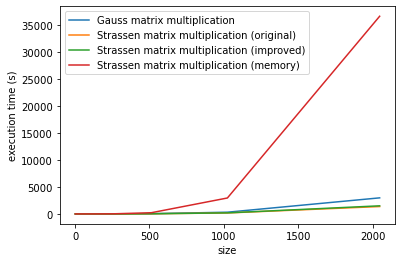

In [40]:
import matplotlib.pyplot as plt 

_ = [plt.plot(times[0], times[i], label = columns[i]) for i in range(1,4)]
__ = plt.xlabel('size') 
___ = plt.ylabel('execution time (s)')
____ = plt.legend()

From the plots above, it is possible to notice that there is a trade-off between space and time. A decrease in the amount of auxiliary memory that the implementation of the algorithm requires is traded for an increase in the execution time.

## Final question: how much is the minimum auxiliary space required to evaluate the Strassen’s algorithm?

In order to answer the question we can consider two scenarios:

1. The *worst case* scenario;
2. The *best case* scenario;

Then we apply it to the implementation of the Strassen's algorithm that requires the minimum amount of memory to be carried out, that is the one that does not store any temporary result but two S matrices and one P matrix. 

### Worst case scenario
In this case all the sizes of the matrices involved in the multiplication are odd. It is then needed to insert a null row and a null column in both matrices. If the multiplication is performed using a first $n$x$m$ matrix and a second $m$x$l$ matrix, the aforementioned procedure takes an amount of memory proportional to
$$
(n+m+1)+(m+l+1)=n+2m+l+2.
$$
In addition to that, the `S1` and `S2` auxiliary matrices take an $4^{-1}[(n+1)(m+1)+(m+1)(l+1)+(n+1)(l+1)]$ amount of space. Then, at each step of the recursion the amount of space required is proportional to 
$$
\begin{align*}
s_i &\propto C_2[(n+1)(l+1)+(m+1)(l+1)+(n+1)(l+1)]+n+2m+l+C_1 \\ 
&= C_2(nm+ml+nl)+C_3(n+l)+C_4m+C_5,\,\,\,\,\,C_3=2C_2+1,\,\,\,\,\,C_4=2(C_2+1),\,\,\,\,\,C_5=3+C_1
\end{align*}
$$
where the constats take also account of the constant amount of space required by the two auxiliary variables that stores the original number of rows of the first matrix ($n$) and the original number of columns of the second matrix ($l$).

According to the implementation that has been carried out, the recursion stops when the maximum between all the sizes $M=\max(n,m,l)$ is smaller than a given threshold. If we suppose to set this threshold to the scalar multiplication, the height of the recursion tree will be $\log_2 M$.

Then the amount of space required by the process is 
$$
\begin{align*}
S &\propto \sum_{i=0}^{\log_2 M}C_2(nm+ml+nl)\frac{1}{4^i}+\sum_{i=0}^{\log_2 M}C_3(n+C_6m+l)\frac{1}{2^i}+\sum_{i=0}^{\log_2 M}C_5,\,\,\,\,\,C_6=\frac{C_4}{C_3},\\
&= C_2(nm+ml+nl)\left(\frac{4}{3}-\frac{1}{3M^2} \right)+C_3(n+C_6m+l)\left(2-\frac{1}{M} \right)+C_5\log_2 2M\\
\end{align*}
$$
which, at large sizes, is dominated by a quadratic term.

For square matrices ($n=m=l$) one obtains
$$
S \propto \frac{4}{3}C_2n^2+2C_3(2+C_6)n+C_5\log_2 2n-(C_2+C-3(2+C_6)).
$$

### Best case scenario
In this case all the sizes of the matrices involved in the multiplication are even, making unnecessary to insert any row or column. If one has two matrices $n$x$m$ and $m$x$l$, the `result` matrix for the final output will be of order $n$x$l$. So at each step of the recursion the amount of space needed is proportional to
$$
\frac{nm+ml+nl}{4}+C.
$$
The total amount of space required is then proportional to
$$
\begin{align*}
S &\propto \sum_{i=0}^{\log_2M}C'(nm+ml+nl)\frac{1}{4^i}+\sum_{i=0}^{\log_2 M}C\\
&= \frac{4}{3}C'(nm+ml+nl)\left(\frac{4}{3}-\frac{1}{3M^2}\right)+C\log_2 2M
\end{align*}
$$
Again, for large sizes, one obtains a quadratic behavior.

For square matrices:
$$
S \propto 4C'n^2+C\log_2 2n-1.
$$